# Shapely and geometric objects

In this lab, you will learn how to create and manipulate geometries in Python using the [Shapely Python Package](https://shapely.readthedocs.io/en/stable/manual.html).

**Sources:**

These materials are based on [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html), [Westra
E. (2013), Chapter 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition), and [AutoGIS](https://automating-gis-processes.github.io/)

## Spatial data model

<img src="https://automating-gis-processes.github.io/site/_images/SpatialDataModel.PNG">
source:https://automating-gis-processes.github.io/site/_images/SpatialDataModel.PNG

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) for doing various geometric operations. Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in other GIS python packages such as GeoPandas.

**Geometric objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

**Useful attributes and methods in Shapely include:**

-  Creating lines and polygons based on a collection of point objects.
-  Calculating areas/length/bounds etc. of input geometries
-  Conducting geometric operations based on the input geometries such as `union`, `difference`, `distance` etc.
-  Conducting spatial queries between geometries such as `intersects`, `touches`, `crosses`, `within` etc.


## Point

Creating point is easy, you pass x and y coordinates into `Point()` -object (+ possibly also z -coordinate):

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

Let's see what these variables now contain: 

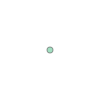

In [2]:
point1

As we see here, Jupyter notebook is able to display the shape directly on the screen.

We can use the print statement to get information about the actual definition of these objects:

In [3]:
print(point1)

POINT (2.2 4.2)


Let's also check the data type of a point:

In [4]:
type(point1)

shapely.geometry.point.Point

### Point attributes and functions

Points and other shapely objects have useful built-in [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

`geom_type` attribute contains information about  the geometry type of the Shapely object:

In [5]:
point1.geom_type

'Point'

Extracting the coordinates of a Point can be done as:

In [6]:
# Get the x and y coordinates of the point
x = point1.x
y = point1.y

In [7]:
print(x, y)

2.2 4.2


It is also possible to calculate the distance between two objects using the [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) method. In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let's calculate the distance between `point1` and `point2`:

In [8]:
# Check input data
print(point1)
print(point2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [9]:
# Calculate the distance between point1 and point2
dist = point1.distance(point2)

# Print out a nicely formatted info message
print("Distance between the points is: ", dist)

Distance between the points is:  29.723559679150142


## LineString


Creating LineString -objects is fairly similar to creating Shapely Points. 

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [10]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [11]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [12]:
# Check if lines are identical
line == line2 

True

Let's see how our line looks like: 

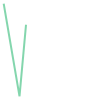

In [13]:
line

In [14]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


As we can see from above, the `line` -variable constitutes of multiple coordinate-pairs.

Check also the data type:

In [15]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [16]:
# Check geometry type of the line object
line.geom_type

'LineString'

### LineString attributes and functions


`LineString` -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](http://toblerity.org/shapely/manual.html). Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with `Point`

In [17]:
# Get xy coordinate tuples
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Again, we have a list of coordinate tuples (x,y) inside a list.

In [18]:
# Get the first point on the line
list(line.coords)[0]

(2.2, 4.2)

If you would need to access all x-coordinates or all y-coordinates of the line, you can do it directly using the `xy` attribute: 

In [19]:
# Extract x and y coordinates separately
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

In [20]:
print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [21]:
# Get the lenght of the line
line_length = line.length
print("Length of our line: ", line_length)

Length of our line:  52.46106912939557


In [22]:
# Get the centroid of the line, the averages of the coordinates.
print(line.centroid)

POINT (6.229961354035622 -11.89241115757239)


We can also check whether two line intersect, also get the intersection if true.

In [23]:
line_3 = LineString([(1, 7), (3, 4)])
line_4 = LineString([(2, 7), (2, 4)])
line_5 = LineString([(0,0),(-1,-1)])

In [24]:
line_3.intersects(line_4)#Check

True

In [25]:
list(line_3.intersection(line_4).coords)#return intersection

[(2.0, 5.5)]

In [26]:
line_4.intersects(line_5)#Check

False

In [27]:
list(line_4.intersection(line_5).coords)#return intersection

[]

## Polygon


Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts a sequence of coordinates as input. 

Polygon needs **at least three coordinate-tuples** (three points are reguired to form a surface):

In [28]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

We can also use the vertex points we defined earlier:

In [29]:
# Create a Polygon based on Shapely points
poly2 = Polygon([point1, point2,point3])

In [30]:
# Check that polygon objects created using two different approaches are identical
poly == poly2

True

Let's see how our Polygon looks like

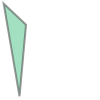

In [31]:
poly

In [32]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Notice that `Polygon` representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. 

Check also the data type:

In [33]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [34]:
# Geometry type
poly.geom_type

'Polygon'

### Polygon attributes and functions


We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `bounding box`, `exterior`, and `exterior-length`. See a full list of methods in the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

Here, we can see a few of the available attributes and how to access them:

In [36]:
# Print the outputs
print("Polygon centroid: ", poly.centroid)

print("Polygon Area: ",  poly.area)

print("Polygon Bounding Box: ", poly.bounds)

print("Polygon Exterior: ", poly.exterior)

print("Polygon Exterior Length: ", poly.exterior.length)#perimeter


Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon` -object. Note that distance metrics will make more sense when we start working with data in a projected coordinate system.

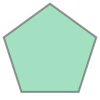

In [37]:
# Pentagon - Coordinates borrowed from this thread: https://tex.stackexchange.com/questions/179843/make-a-polygon-with-automatically-labelled-nodes-according-to-their-coordinates
pentagon = Polygon([(30, 2.01), (31.91, 0.62), (31.18, -1.63), 
         (28.82, -1.63), (28.09, 0.62)])

pentagon

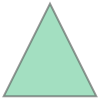

In [38]:
# Triangle
triangle = Polygon([(0,0), (2,4), (4,0)])
triangle

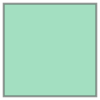

In [39]:
# Square
square = Polygon([(0,0), (0,4), (4,4), (4,0)])
square

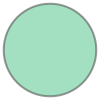

In [40]:
# Circle (using a buffer around a point)
point = Point((0,0))
circle = point.buffer(1)
circle

Check whether a Point is inside of a polygon using the `.contains()` method:
`Polygon.contains(Point)`

In [41]:
circle.contains(point)#Check

True

## Geometry collections (optional)


In some occassions it is useful to store multiple geometries (for example, several points or several polygons) in a single feature. For example, when we want to figure out the road intersections among a large number of road segments.



In Shapely, collections of points are implemented by using a MultiPoint -object, collections of curves by using a MultiLineString -object, and collections of surfaces by a MultiPolygon -object. 

In [42]:
# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

Let's start by creating MultiPoint and MultilineString objects:

In [43]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# For polygons
multi_polygon = MultiPolygon([square, circle])

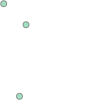

In [44]:
multi_point

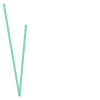

In [45]:
multi_line

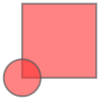

In [46]:
multi_polygon

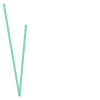

In [47]:
multi_line

MultiLine line-line intersections:

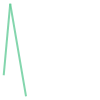

In [48]:
from shapely import affinity
#First we could rotate the multi_line to 180 degrees
multi_line_r = affinity.rotate(multi_line,180)
multi_line_r

In [49]:
#Then check whether the upside down lines are intersecting with the original ones
multi_line_r.intersects(multi_line)#

True

In [50]:
#Get intersections
print(multi_line_r.intersection(multi_line))

MULTIPOINT (3.543679498553965 -3.673961861526233, 7.916320501446036 -17.22603813847376)
